# Count Models with pyMC

1. Poisson
2. Poisson Regression
3. Poisson Regression with Time
4. Multinomial Counts
5. Multinomial Counts over Time


## Basic Poisson Count

In [20]:
import numpy as np
import pytensor.tensor as pt
import pandas as pd
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

import pymc as pm
import arviz as az
az.style.use("arviz-darkgrid")

(array([ 3., 14., 15., 16., 13., 15.,  8.,  7.,  5.,  4.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

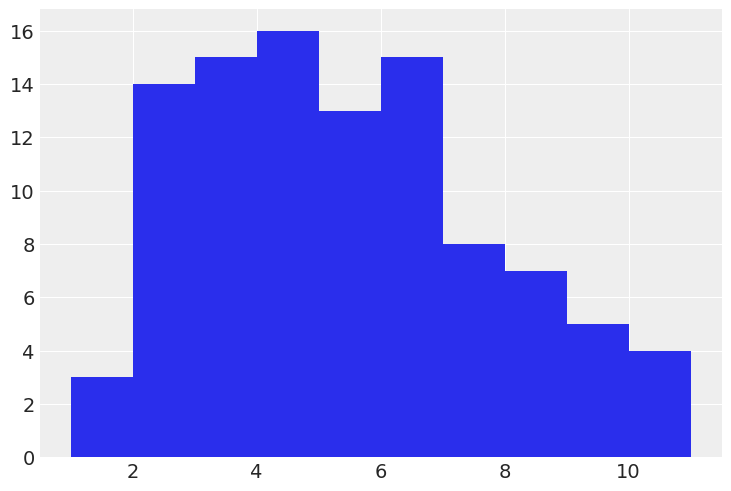

In [21]:
np.random.seed(42)
true_rate = 5
x = np.random.poisson(lam=true_rate, size=100)
plt.hist(x, bins=10)

In [22]:
print(x[0:10])
x.mean()

[5 4 4 5 5 3 5 4 6 7]


4.94

In [14]:
with pm.Model() as poisson_model:
       rate = pm.Exponential("rate", 1.0)  # Prior for rate parameter
       counts = pm.Poisson("counts", mu=rate, observed=x)  # Likelihood

In [23]:
# Sample from posterior
with poisson_model:
    trace = pm.sample(1000, tune=1000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rate]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'rate'}>,
        <Axes: title={'center': 'rate'}>]], dtype=object)

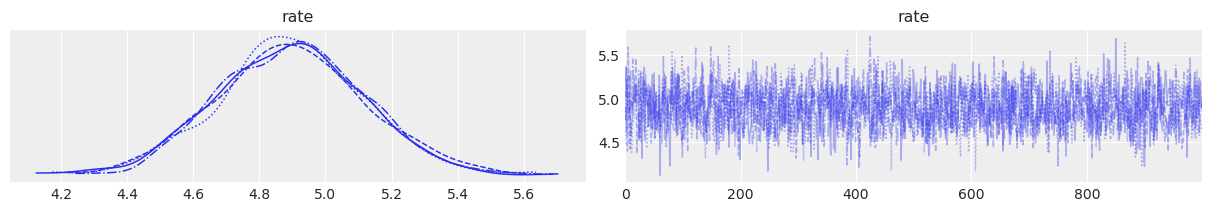

In [24]:
pm.summary(trace)
pm.plot_trace(trace)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

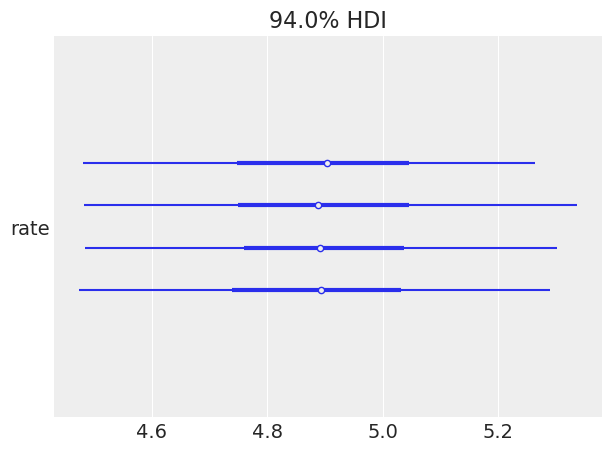

In [25]:
az.plot_forest(trace)

# Poisson Regression Model

In [59]:
# Simulate some data
np.random.seed(123)
size = 100
X = np.random.normal(0, 1, size)
beta = 1.5
alpha = 2.0
lambda_ = np.exp(alpha + beta * X) # True rate = exp(alpha + beta*X)
print(np.exp(alpha))
print(lambda_.mean())
Y = np.random.poisson(lambda_)

7.38905609893065
27.142853915440647


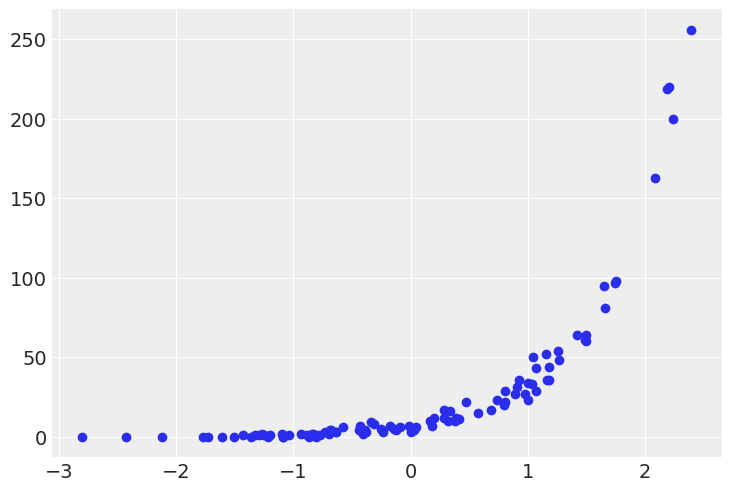

In [64]:
# plt.hist(Y, bins = 25)
plt.scatter(x = X, y = Y)

In [65]:
# Define the model
with pm.Model() as poisson_model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    
    # Expected value of outcome (using the log link function)
    mu = pm.math.exp(alpha + beta * X)
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Poisson('Y_obs', mu=mu, observed=Y)
    
    # Inference
    trace = pm.sample(2000, tune=1000, cores=2)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


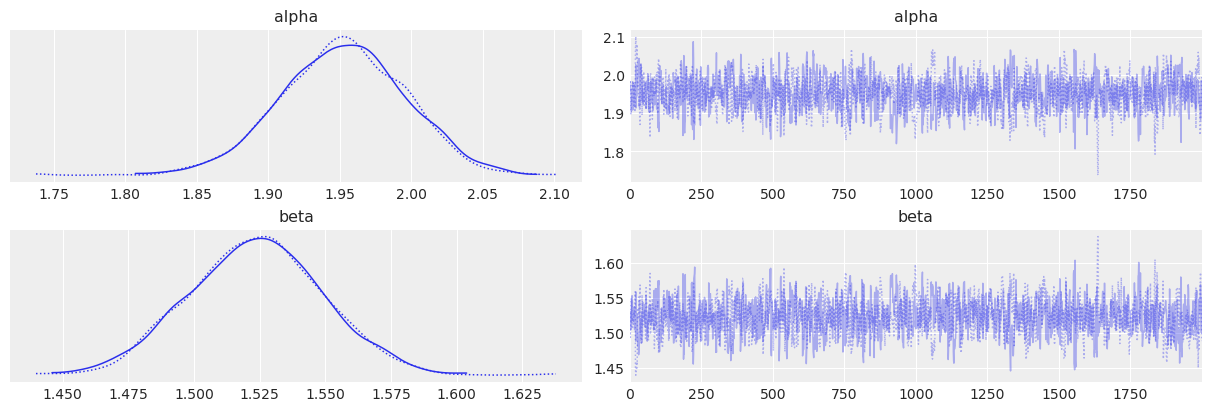

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  1.952  0.043   1.873    2.033      0.001    0.001    1009.0    1029.0   
beta   1.524  0.025   1.479    1.573      0.001    0.001    1026.0    1037.0   

       r_hat  
alpha    1.0  
beta     1.0  


In [66]:
# Plot the results
pm.plot_trace(trace)
plt.show()

# Print summary of the trace
print(pm.summary(trace))

Poisson Regression over Time

In [67]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Simulate some data
np.random.seed(123)
size = 100
time = np.arange(0,11)
beta = 0.2
alpha = 0.1
lambda_ = np.exp(alpha + beta * time) # True rate = exp(alpha + beta*X)
Y = np.random.poisson(lambda_)

1.1051709180756477
3.6416609384960976


11

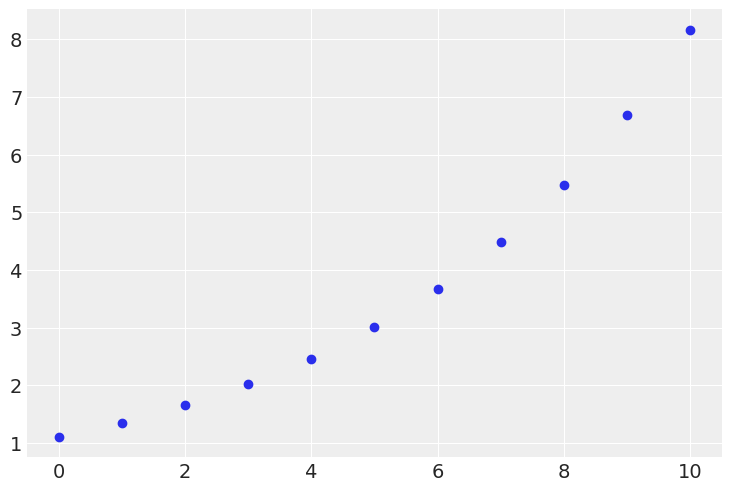

In [96]:
plt.scatter(x = time, y = lambda_)

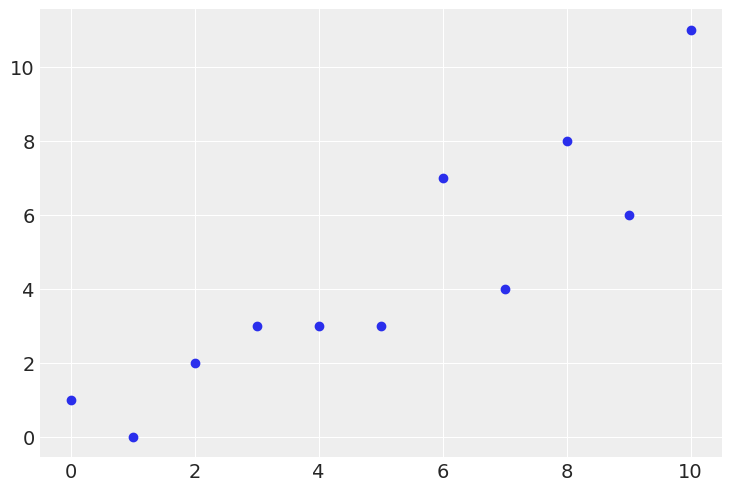

In [97]:
plt.scatter(x = time, y = Y)

In [99]:
with pm.Model() as poisson_reg_model:
    alpha = pm.Normal('alpha', mu = 0, sigma = 3)
    beta = pm.Normal('beta', mu = 0, sigma = 5)

    eta = pm.math.exp(alpha + beta * time)

    Y_obs = pm.Poisson('Y_obs', mu=eta, observed=Y)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

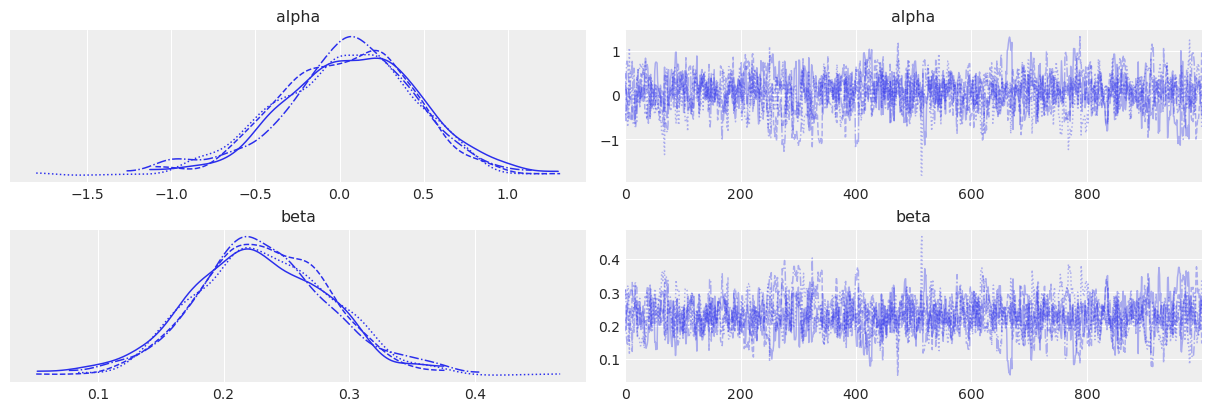

In [100]:
with poisson_reg_model:
    trace = pm.sample(1000, tune = 1000)

pm.plot_trace(trace)

## Adding Locations

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

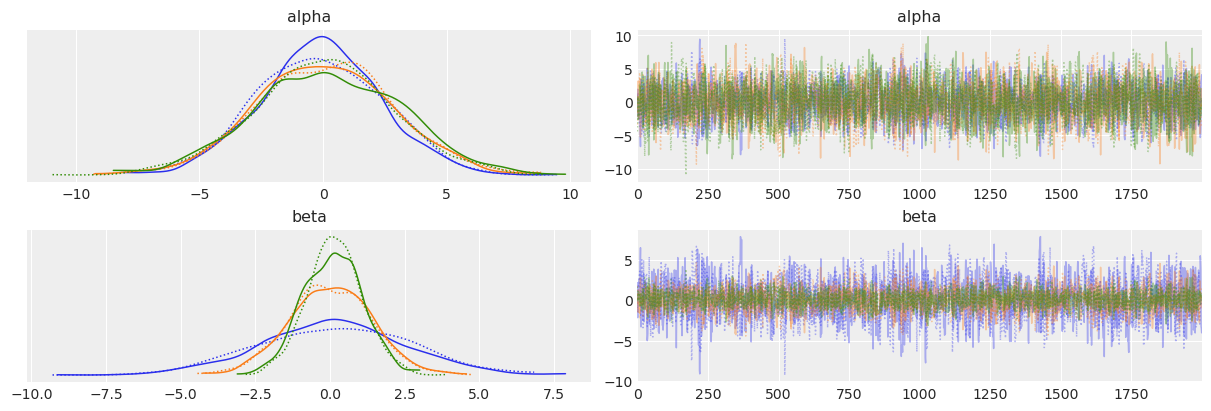

In [105]:
# Simulate some data
np.random.seed(123)
size = 100
time = np.arange(0, 11)
locations = np.random.choice([1, 2, 3], size=size)  # Three locations
alpha = np.array([0.1, 0.2, 0.3])  # Intercepts for each location
beta = np.array([0.2, 0.3, 0.4])  # Slopes for each location

# Calculate the linear predictor for each location
lambda_ = np.exp(alpha[locations-1] + beta[locations-1] * time[:size % len(time)])

# Simulate Poisson counts
Y = np.random.poisson(lambda_)

# Define the model
with pm.Model() as poisson_reg_model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=3, shape=3)
    beta = pm.Normal('beta', mu=0, sigma=5, shape=3)
    
    # Expected value of outcome (using the log link function)
    eta = pm.math.exp(alpha[locations-1] + beta[locations-1] * time[locations % len(time)])
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Poisson('Y_obs', mu=eta, observed=Y)
    
    # Inference
    trace = pm.sample(2000, tune=1000, cores=2)

# Plot the results
pm.plot_trace(trace)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


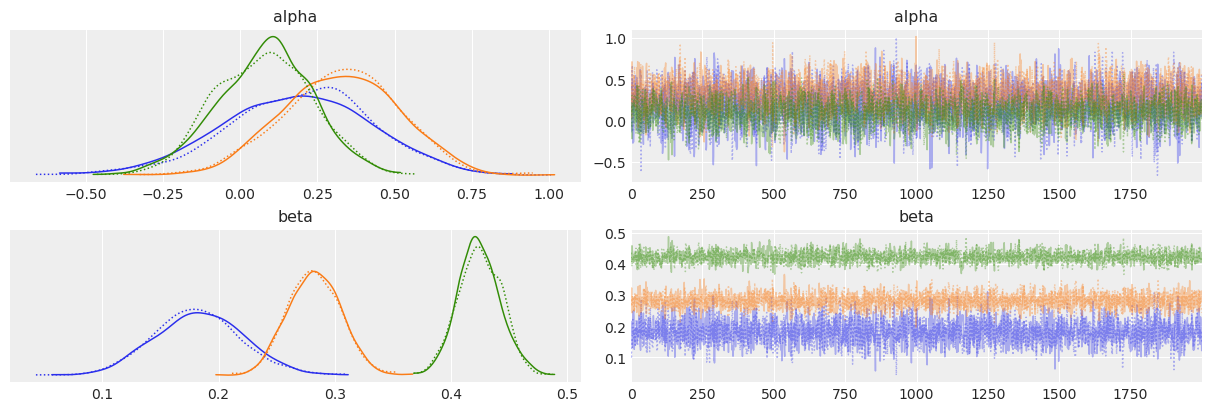

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0]  0.187  0.237  -0.246    0.641      0.005    0.004    2579.0   
alpha[1]  0.327  0.186  -0.009    0.670      0.004    0.003    2470.0   
alpha[2]  0.078  0.155  -0.200    0.378      0.003    0.003    2200.0   
beta[0]   0.182  0.037   0.110    0.251      0.001    0.001    2524.0   
beta[1]   0.282  0.023   0.239    0.321      0.000    0.000    2423.0   
beta[2]   0.424  0.018   0.390    0.459      0.000    0.000    2197.0   

          ess_tail  r_hat  
alpha[0]    1954.0    1.0  
alpha[1]    2516.0    1.0  
alpha[2]    1880.0    1.0  
beta[0]     2073.0    1.0  
beta[1]     2450.0    1.0  
beta[2]     1915.0    1.0  


In [107]:
# Simulate some data
np.random.seed(123)
size = 100
time = np.tile(np.arange(0, 11), size // 11 + 1)[:size]  # Repeat time array to match the size
locations = np.random.choice([1, 2, 3], size=size)  # Three locations
alpha = np.array([0.1, 0.2, 0.3])  # Intercepts for each location
beta = np.array([0.2, 0.3, 0.4])  # Slopes for each location

# Calculate the linear predictor for each location
lambda_ = np.exp(alpha[locations-1] + beta[locations-1] * time)

# Simulate Poisson counts
Y = np.random.poisson(lambda_)

# Define the model
with pm.Model() as poisson_reg_model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=3, shape=3)
    beta = pm.Normal('beta', mu=0, sigma=5, shape=3)
    
    # Expected value of outcome (using the log link function)
    eta = pm.math.exp(alpha[locations-1] + beta[locations-1] * time)
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Poisson('Y_obs', mu=eta, observed=Y)
    
    # Inference
    trace = pm.sample(2000, tune=1000, cores=2)

# Plot the results
pm.plot_trace(trace)
plt.show()

# Print summary of the trace
print(pm.summary(trace))

# Multinomial Logistic Regression??

In [125]:
# Simulate some data
np.random.seed(123)
size = 100
time = np.tile(np.arange(0, 11), size // 11 + 1)[:size]  # Repeat time array to match the size
locations = np.random.choice([1, 2, 3], size=size)  # Three locations
alpha = np.array([[0.1, 0.2, 0.3], [0.2, 0.3, 0.4], [0.3, 0.4, 0.5]])  # Intercepts for each location and category
beta = np.array([[0.2, 0.3, 0.4], [0.3, 0.4, 0.5], [0.4, 0.5, 0.6]])   # Slopes for each location and category

# Calculate the linear predictor for each location and category
eta = np.array([alpha[loc-1] + beta[loc-1] * time[i] for i, loc in enumerate(locations)])

# Apply the softmax function to get probabilities
probs = np.exp(eta) / np.sum(np.exp(eta), axis=1, keepdims=True)

# Simulate multinomial counts
Y = np.array([np.random.multinomial(20, p) for p in probs])

# Define the model
with pm.Model() as multinomial_model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=3, shape=(3, 3))
    beta = pm.Normal('beta', mu=0, sigma=5, shape=(3, 3))
    
    # Expected value of outcome (using the softmax link function)
    eta = alpha[locations-1] + beta[locations-1] * time[:, None]
    mu = pm.math.softmax(eta)
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Multinomial('Y_obs', n=1, p=mu, observed=Y)
    
    # Inference
    trace = pm.sample(2000, tune=1000, cores=2)

# Plot the results
pm.traceplot(trace)
plt.show()

# Print summary of the trace
print(pm.summary(trace))

Initializing NUTS using jitter+adapt_diag...


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'alpha': array([[-0.88675255,  0.19132054, -0.35940714],
       [-0.02688643, -0.88805708,  0.3829093 ],
       [-0.28335181, -0.75501988,  0.80121229]]), 'beta': array([[-0.19634732, -0.43632894,  0.71268852],
       [ 0.82913619, -0.55814938, -0.9273059 ],
       [-0.00657398, -0.06052831,  0.55350813]])}

Logp initial evaluation results:
{'alpha': -18.33, 'beta': -22.81, 'Y_obs': -inf}
You can call `model.debug()` for more details.

In [127]:
multinomial_model.debug()

point={'alpha': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]), 'beta': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])}

The variable Y_obs has the following parameters:
0: [1] [id A] <Vector(int8, shape=(1,))>
1: Softmax{axis=None} [id B] <Matrix(float64, shape=(100, ?))>
 └─ Add [id C] <Matrix(float64, shape=(100, ?))>
    ├─ AdvancedSubtensor1 [id D] <Matrix(float64, shape=(100, 3))>
    │  ├─ alpha [id E] <Matrix(float64, shape=(3, 3))>
    │  └─ [2 1 2 2 0 ... 1 2 2 1 2] [id F] <Vector(uint8, shape=(100,))>
    └─ Mul [id G] <Matrix(float64, shape=(100, ?))>
       ├─ AdvancedSubtensor1 [id H] <Matrix(float64, shape=(100, 3))>
       │  ├─ beta [id I] <Matrix(float64, shape=(3, 3))>
       │  └─ [2 1 2 2 0 ... 1 2 2 1 2] [id F] <Vector(uint8, shape=(100,))>
       └─ [[ 0.] [ 1 ... 0.] [ 0.]] [id J] <Matrix(float64, shape=(100, 1))>
The parameters evaluate to:
0: [1]
1: [[0.00333333 0.00333333 0.00333333]
 [0.00333333 0.00333333 0.00333333]
 [0.00

In [129]:
# Simulate some data
np.random.seed(123)
size = 100
time = np.tile(np.arange(0, 11), size // 11 + 1)[:size]  # Repeat time array to match the size
locations = np.random.choice([1, 2, 3], size=size)  # Three locations
alpha = np.array([[0.1, 0.2, 0.3], [0.2, 0.3, 0.4], [0.3, 0.4, 0.5]])  # Intercepts for each location and category
beta = np.array([[0.2, 0.3, 0.4], [0.3, 0.4, 0.5], [0.4, 0.5, 0.6]])   # Slopes for each location and category

# Calculate the linear predictor for each location and category
eta = np.array([alpha[loc-1] + beta[loc-1] * time[i] for i, loc in enumerate(locations)])

# Apply the softmax function to get probabilities
probs = np.exp(eta) / np.sum(np.exp(eta), axis=1, keepdims=True)

# Simulate multinomial counts
Y = np.array([np.random.multinomial(20, p) for p in probs])

# Define the model
with pm.Model() as multinomial_model:
    # Priors for unknown model parameters with better initial values
    alpha = pm.Normal('alpha', mu=0.1, sigma=3, shape=(3, 3), initval=np.array([[0.1, 0.2, 0.3], [0.2, 0.3, 0.4], [0.3, 0.4, 0.5]]))
    beta = pm.Normal('beta', mu=0.2, sigma=5, shape=(3, 3), initval=np.array([[0.2, 0.3, 0.4], [0.3, 0.4, 0.5], [0.4, 0.5, 0.6]]))
    
    # Expected value of outcome (using the softmax link function)
    eta = alpha[locations-1] + beta[locations-1] * time[:, None]
    mu = pm.math.softmax(eta)
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Multinomial('Y_obs', n=1, p=mu, observed=Y)
    
    # Inference
    trace = pm.sample(2000, tune=1000, cores=2)

# Plot the results
pm.plot_trace(trace)
plt.show()

# Print summary of the trace
print(pm.summary(trace))

Initializing NUTS using jitter+adapt_diag...


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'alpha': array([[-0.18258178, -0.58020158,  1.11403078],
       [ 0.47457513,  1.00672874, -0.10072794],
       [ 0.80709032,  1.13539307,  1.05841837]]), 'beta': array([[ 1.08363456, -0.22631421,  0.0470445 ],
       [ 0.12547992,  0.22474638,  1.22393427],
       [ 0.95742791,  0.39723367,  1.43739257]])}

Logp initial evaluation results:
{'alpha': -18.44, 'beta': -22.84, 'Y_obs': -inf}
You can call `model.debug()` for more details.

In [131]:
multinomial_model.debug()

point={'alpha': array([[0.1, 0.2, 0.3],
       [0.2, 0.3, 0.4],
       [0.3, 0.4, 0.5]]), 'beta': array([[0.2, 0.3, 0.4],
       [0.3, 0.4, 0.5],
       [0.4, 0.5, 0.6]])}

The variable Y_obs has the following parameters:
0: [1] [id A] <Vector(int8, shape=(1,))>
1: Softmax{axis=None} [id B] <Matrix(float64, shape=(100, ?))>
 └─ Add [id C] <Matrix(float64, shape=(100, ?))>
    ├─ AdvancedSubtensor1 [id D] <Matrix(float64, shape=(100, 3))>
    │  ├─ alpha [id E] <Matrix(float64, shape=(3, 3))>
    │  └─ [2 1 2 2 0 ... 1 2 2 1 2] [id F] <Vector(uint8, shape=(100,))>
    └─ Mul [id G] <Matrix(float64, shape=(100, ?))>
       ├─ AdvancedSubtensor1 [id H] <Matrix(float64, shape=(100, 3))>
       │  ├─ beta [id I] <Matrix(float64, shape=(3, 3))>
       │  └─ [2 1 2 2 0 ... 1 2 2 1 2] [id F] <Vector(uint8, shape=(100,))>
       └─ [[ 0.] [ 1 ... 0.] [ 0.]] [id J] <Matrix(float64, shape=(100, 1))>
The parameters evaluate to:
0: [1]
1: [[1.06742040e-04 1.17968198e-04 1.30375022e-04]
 [1.30375022

# HMLR 

* Synthetic data, multinomial counts over time with variants at locations 1, 2, 3.
* Parameters for each location and variant

In [203]:
# Simulate some data
import pytensor

np.random.seed(123)
size = 100
time = np.tile(np.arange(0, 31), size // 31 + 1)[:size]  # Repeat time array to match the size
locations = np.random.choice([1, 2, 3], size=size)  # Three locations
alpha = np.array([[0.1, 0.2, 0.3], [0.2, 0.3, 0.4], [0.3, 0.4, 0.5]])  # Intercepts for each location and category
beta = np.array([[0.2, 0.3, 0.4], [0.3, 0.4, 0.5], [0.4, 0.5, 0.6]])   # Slopes for each location and category

# Calculate the linear predictor for each location and category
eta = np.array([alpha[loc-1] + beta[loc-1] * time[i] for i, loc in enumerate(locations)])

# Apply the softmax function to get probabilities
probs = np.exp(eta) / np.sum(np.exp(eta), axis=1, keepdims=True)

# Simulate multinomial counts
Y = np.array([np.random.multinomial(20, p) for p in probs])

/opt/anaconda3/envs/asper_pymc/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


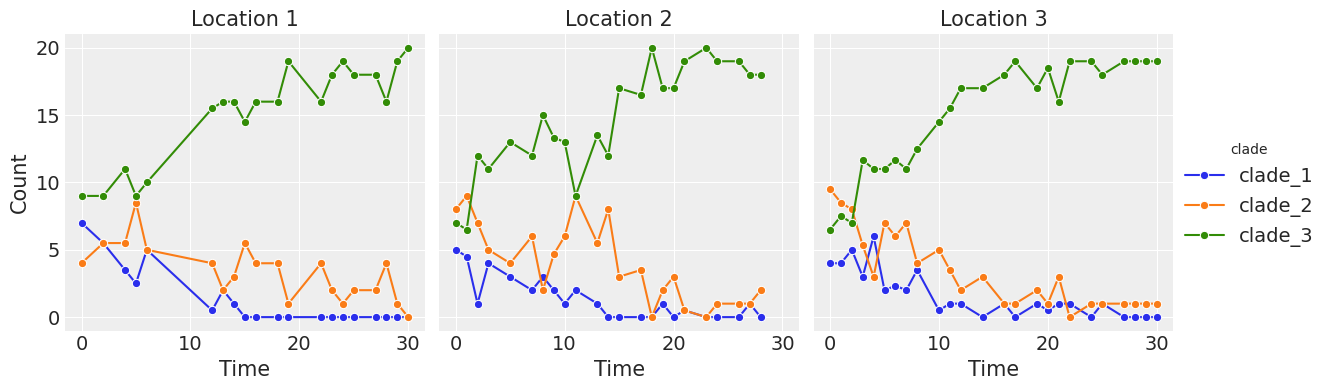

In [204]:
# Convert the simulated data to a DataFrame for plotting
data = pd.DataFrame({
    'time': time,
    'location': locations,
    'clade_1': Y[:, 0],
    'clade_2': Y[:, 1],
    'clade_3': Y[:, 2]
})

# Melt the DataFrame for easier plotting with seaborn
data_melted = data.melt(id_vars=['time', 'location'], value_vars=['clade_1', 'clade_2', 'clade_3'],
                        var_name='clade', value_name='count')

# Plot the response counts over time for each location using a faceted grid
g = sns.FacetGrid(data_melted, col="location", hue="clade", col_wrap=3, height=4)
g.map(sns.lineplot, "time", "count", marker="o", errorbar=None)
g.add_legend()
g.set_axis_labels("Time", "Count")
g.set_titles("Location {col_name}")
plt.show()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


Output()

Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 314 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [Y_obs]


Output()

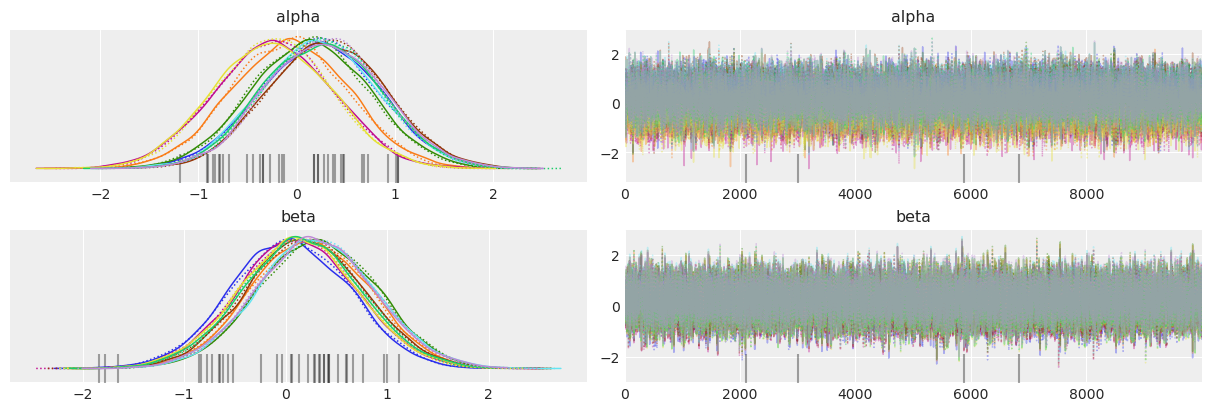

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0, 0]  0.232  0.605  -0.879    1.398      0.005    0.004   13571.0   
alpha[0, 1] -0.076  0.597  -1.198    1.048      0.005    0.005   13369.0   
alpha[0, 2]  0.128  0.593  -0.986    1.249      0.005    0.005   13695.0   
alpha[1, 0] -0.231  0.603  -1.359    0.891      0.006    0.004   10446.0   
alpha[1, 1]  0.306  0.595  -0.773    1.443      0.006    0.004   10329.0   
alpha[1, 2]  0.232  0.593  -0.892    1.324      0.006    0.004   10228.0   
alpha[2, 0] -0.244  0.594  -1.383    0.846      0.005    0.005   12446.0   
alpha[2, 1]  0.250  0.590  -0.863    1.336      0.005    0.004   12316.0   
alpha[2, 2]  0.280  0.590  -0.781    1.424      0.005    0.004   12263.0   
beta[0, 0]   0.042  0.581  -1.037    1.137      0.005    0.005   13316.0   
beta[0, 1]   0.236  0.581  -0.837    1.335      0.005    0.004   13367.0   
beta[0, 2]   0.316  0.581  -0.771    1.404      0.005    0.004   13360.0   
beta[1, 0]  

In [ ]:
# Improvements to be made:
# Make the multinomial counts (observed counts) on each day vary, some 0's
# Posterior predictive draws
# Add priors on sigmas for alpha/betas

# Define the model
with pm.Model() as multinomial_model:
    # Priors for unknown model parameters with better initial values
    alpha = pm.Normal('alpha', mu=0.1, sigma=1, shape=(3, 3))
    beta = pm.Normal('beta', mu=0.2, sigma=1, shape=(3, 3))
    
    # Expected value of outcome (using the softmax link function)
    eta = alpha[locations-1] + beta[locations-1] * time[:, None]

    mu = pytensor.tensor.special.softmax(eta + 1e-6, axis = 1)
    #mu = pm.math.softmax(eta + 1e-6)  # Add a small constant to avoid numerical issue
    #pt.pytensor.printing.Print(mu)

    ## Add constraint that when softmax or counts is zero, skip adding likelihood

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Multinomial('Y_obs', n=20, p=mu, observed=Y)
    
    # Inference
    trace = pm.sample(10000, tune=2000, cores=2)

    # Perform posterior predictive sampling within the model's context
    posterior_predictive = pm.sample_posterior_predictive(trace)

# Plot the results
pm.plot_trace(trace)
plt.show()

# Print summary of the trace
print(pm.summary(trace))

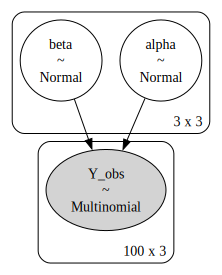

In [212]:
multinomial_model.to_graphviz()

In [206]:
type(posterior_predictive)

arviz.data.inference_data.InferenceData

In [209]:
stacked = az.extract(trace)
stacked

<xarray.Dataset> Size: 3MB
Dimensions:      (alpha_dim_0: 3, alpha_dim_1: 3, sample: 20000, beta_dim_0: 3,
                  beta_dim_1: 3)
Coordinates:
  * alpha_dim_0  (alpha_dim_0) int64 24B 0 1 2
  * alpha_dim_1  (alpha_dim_1) int64 24B 0 1 2
  * beta_dim_0   (beta_dim_0) int64 24B 0 1 2
  * beta_dim_1   (beta_dim_1) int64 24B 0 1 2
  * sample       (sample) object 160kB MultiIndex
  * chain        (sample) int64 160kB 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
  * draw         (sample) int64 160kB 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999
Data variables:
    alpha        (alpha_dim_0, alpha_dim_1, sample) float64 1MB 0.2187 ... 0....
    beta         (beta_dim_0, beta_dim_1, sample) float64 1MB 0.06966 ... 0.334
Attributes:
    created_at:                 2025-03-05T15:47:39.491777+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.20.1
    sampling_time:              313.9546151161194
    tuning_steps:               2000

In [210]:
stacked.mean()

<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    alpha    float64 8B 0.0975
    beta     float64 8B 0.1951

In [202]:
posterior_predictive.posterior_predictive['Y_obs'][1, :]

<xarray.DataArray 'Y_obs' (draw: 10000, Y_obs_dim_2: 100, Y_obs_dim_3: 3)> Size: 24MB
array([[[ 6,  5,  9],
        [ 8,  6,  6],
        [ 5,  7,  8],
        ...,
        [ 1,  6, 13],
        [ 1,  5, 14],
        [ 7,  6,  7]],

       [[ 1,  8, 11],
        [ 5,  4, 11],
        [ 4,  7,  9],
        ...,
        [ 3,  6, 11],
        [ 1,  5, 14],
        [ 4,  5, 11]],

       [[ 4,  7,  9],
        [ 6,  6,  8],
        [ 3,  7, 10],
        ...,
...
        ...,
        [ 3,  3, 14],
        [ 2,  3, 15],
        [ 5, 10,  5]],

       [[ 4,  6, 10],
        [ 8,  6,  6],
        [ 2, 10,  8],
        ...,
        [ 0,  5, 15],
        [ 2,  2, 16],
        [ 5,  9,  6]],

       [[ 5,  6,  9],
        [ 8, 11,  1],
        [ 7,  5,  8],
        ...,
        [ 2,  6, 12],
        [ 0,  7, 13],
        [ 7,  5,  8]]])
Coordinates:
    chain        int64 8B 1
  * draw         (draw) int64 80kB 0 1 2 3 4 5 ... 9994 9995 9996 9997 9998 9999
  * Y_obs_dim_2  (Y_obs_dim_2) int64 800B 0 1 2 3 4 5 6 ... 93 94 95 96 97 98 99
  * Y_obs_dim_3  (Y_obs_dim_3) int64 24B 0 1 2

In [ ]:
# Extract the model predictions
predicted_probs = posterior_predictive.posterior_predictive['Y_obs']

# Convert the predicted data to a DataFrame for plotting
predicted_data = pd.DataFrame({
    'time': time,
    'location': locations,
    'clade_1': predicted_probs[:, :, 0].mean(axis=1),
    'clade_2': predicted_probs[:, :, 1].mean(axis=1),
    'clade_3': predicted_probs[:, :, 2].mean(axis=1)
})

# Melt the predicted DataFrame for easier plotting with seaborn
predicted_data_melted = predicted_data.melt(id_vars=['time', 'location'], value_vars=['clade_1', 'clade_2', 'clade_3'],
                                            var_name='clade', value_name='predicted_count')

# Plot the response counts over time for each location using a faceted grid without shaded regions
g = sns.FacetGrid(data_melted, col="location", hue="clade", col_wrap=3, height=4)
g.map(sns.lineplot, "time", "count", marker="o", ci=None)
g.map(sns.lineplot, "time", "predicted_count", data=predicted_data_melted, linestyle="--", ci=None)
g.add_legend()
g.set_axis_labels("Time", "Count")
g.set_titles("Location {col_name}")
plt.show()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [asd, bsd, alpha, beta]


Output()

Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 56 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [Y_obs]


Output()

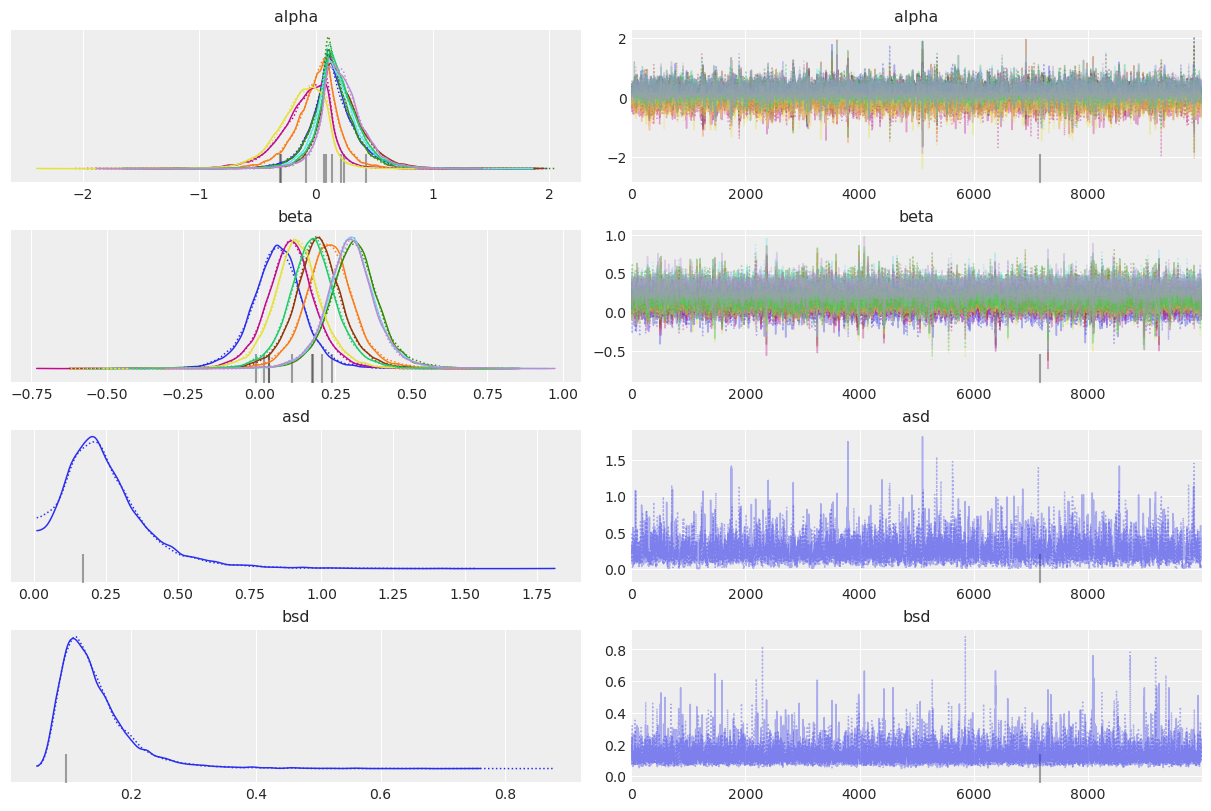

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0, 0]  0.142  0.210  -0.242    0.567      0.002    0.002   13098.0   
alpha[0, 1]  0.009  0.201  -0.400    0.352      0.002    0.002   10725.0   
alpha[0, 2]  0.143  0.197  -0.226    0.521      0.002    0.002   12192.0   
alpha[1, 0] -0.091  0.222  -0.526    0.286      0.003    0.002    7106.0   
alpha[1, 1]  0.216  0.202  -0.136    0.620      0.002    0.002   10138.0   
alpha[1, 2]  0.175  0.196  -0.193    0.554      0.002    0.002   11656.0   
alpha[2, 0] -0.124  0.215  -0.561    0.208      0.003    0.002    5323.0   
alpha[2, 1]  0.191  0.189  -0.163    0.554      0.002    0.002    9143.0   
alpha[2, 2]  0.224  0.190  -0.101    0.610      0.002    0.002    8697.0   
beta[0, 0]   0.060  0.090  -0.113    0.231      0.001    0.001   11024.0   
beta[0, 1]   0.229  0.089   0.057    0.394      0.001    0.001   10966.0   
beta[0, 2]   0.313  0.089   0.143    0.481      0.001    0.001   10932.0   
beta[1, 0]  

In [ ]:
# Improvements to be made:
# Make the multinomial counts (observed counts) on each day vary, some 0's
# Posterior predictive draws
# Add priors on sigmas for alpha/betas
## ADDING PRIORS TO SDs

# Define the model
with pm.Model() as multinomial_model:
    # SD Priors
    asd = pm.HalfNormal('asd', sigma = 5)
    bsd = pm.HalfNormal('bsd', sigma = 10)

    # Priors for unknown model parameters with better initial values
    alpha = pm.Normal('alpha', mu=0.1, sigma=asd, shape=(3, 3))
    beta = pm.Normal('beta', mu=0.2, sigma=bsd, shape=(3, 3))
    
    # Expected value of outcome (using the softmax link function)
    eta = alpha[locations-1] + beta[locations-1] * time[:, None]

    mu = pytensor.tensor.special.softmax(eta + 1e-6, axis = 1)
    #mu = pm.math.softmax(eta + 1e-6)  # Add a small constant to avoid numerical issue
    #pt.pytensor.printing.Print(mu)

    ## Add constraint that when softmax or counts is zero, skip adding likelihood

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Multinomial('Y_obs', n=20, p=mu, observed=Y)
    
    # Inference
    trace = pm.sample(10000, tune=2000, cores=2)

    # Perform posterior predictive sampling within the model's context
    posterior_predictive = pm.sample_posterior_predictive(trace)

# Plot the results
pm.plot_trace(trace)
plt.show()

# Print summary of the trace
print(pm.summary(trace))

In [177]:
np.random.seed(123)
size = 100
time = np.tile(np.arange(0, 11), size // 11 + 1)[:size]  # Repeat time array to match the size
locations = np.random.choice([1, 2, 3], size=size)  # Three locations
alpha = np.array([[0.1, 0.2, 0.3], [0.2, 0.3, 0.4], [0.3, 0.4, 0.5]])  # Intercepts for each location and category
beta = np.array([[0.2, 0.3, 0.4], [0.3, 0.4, 0.5], [0.4, 0.5, 0.6]])   # Slopes for each location and category

# Calculate the linear predictor for each location and category
eta = np.array([alpha[loc-1] + beta[loc-1] * time[i] for i, loc in enumerate(locations)])

# Apply the softmax function to get probabilities
probs = np.exp(eta) / np.sum(np.exp(eta), axis=1, keepdims=True)
probs = np.exp(eta) / np.sum(np.exp(eta), axis=1, keepdims=True)

print(eta)
print(probs)
#probs.sum(axis=1)

np.random.multinomial(n = 20, pvals = probs[1])


[[0.3 0.4 0.5]
 [0.5 0.7 0.9]
 [1.1 1.4 1.7]
 [1.5 1.9 2.3]
 [0.9 1.4 1.9]
 [2.3 2.9 3.5]
 [2.7 3.4 4.1]
 [2.3 3.1 3.9]
 [3.5 4.4 5.3]
 [2.9 3.9 4.9]
 [4.3 5.4 6.5]
 [0.2 0.3 0.4]
 [0.3 0.5 0.7]
 [0.8 1.1 1.4]
 [1.5 1.9 2.3]
 [1.4 1.9 2.4]
 [1.1 1.7 2.3]
 [2.7 3.4 4.1]
 [1.5 2.3 3.1]
 [2.6 3.5 4.4]
 [3.9 4.9 5.9]
 [3.2 4.3 5.4]
 [0.1 0.2 0.3]
 [0.3 0.5 0.7]
 [0.5 0.8 1.1]
 [0.7 1.1 1.5]
 [1.4 1.9 2.4]
 [2.3 2.9 3.5]
 [1.3 2.  2.7]
 [3.1 3.9 4.7]
 [1.7 2.6 3.5]
 [1.9 2.9 3.9]
 [3.2 4.3 5.4]
 [0.1 0.2 0.3]
 [0.5 0.7 0.9]
 [0.5 0.8 1.1]
 [0.7 1.1 1.5]
 [0.9 1.4 1.9]
 [2.3 2.9 3.5]
 [2.  2.7 3.4]
 [2.3 3.1 3.9]
 [3.5 4.4 5.3]
 [3.9 4.9 5.9]
 [4.3 5.4 6.5]
 [0.2 0.3 0.4]
 [0.3 0.5 0.7]
 [0.5 0.8 1.1]
 [1.5 1.9 2.3]
 [1.4 1.9 2.4]
 [1.1 1.7 2.3]
 [2.7 3.4 4.1]
 [3.1 3.9 4.7]
 [3.5 4.4 5.3]
 [3.9 4.9 5.9]
 [3.2 4.3 5.4]
 [0.3 0.4 0.5]
 [0.3 0.5 0.7]
 [0.8 1.1 1.4]
 [0.7 1.1 1.5]
 [1.9 2.4 2.9]
 [1.1 1.7 2.3]
 [2.7 3.4 4.1]
 [2.3 3.1 3.9]
 [3.5 4.4 5.3]
 [1.9 2.9 3.9]
 [4.3 5.4 6.5]
 [0.3 0.4 

array([4, 8, 8])

# Working Re-Parameterized HMLR

/opt/anaconda3/envs/asper_pymc/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


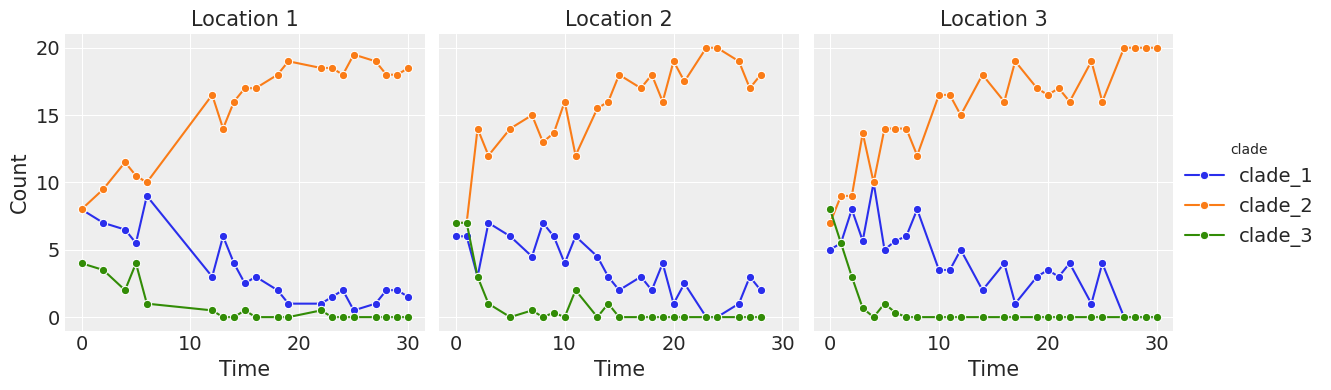

In [ ]:
# Simulate some data
np.random.seed(123)
size = 100
time = np.tile(np.arange(0, 31), size // 31 + 1)[:size]  # Repeat time array to match the size
locations = np.random.choice([1, 2, 3], size=size)  # Three locations
alpha = np.array([[0.1, 0.2], [0.2, 0.3], [0.3, 0.4]])  # Intercepts for each location and category (K-1)
beta = np.array([[0.2, 0.3], [0.3, 0.4], [0.4, 0.5]])   # Slopes for each location and category (K-1)

# Calculate the linear predictor for each location and category
eta = np.array([alpha[loc-1] + beta[loc-1] * time[i] for i, loc in enumerate(locations)])

# Apply the softmax function to get probabilities
probs = np.exp(eta) / (1 + np.sum(np.exp(eta), axis=1, keepdims=True))
probs = np.hstack([probs, 1 - np.sum(probs, axis=1, keepdims=True)])  # Add the K-th category

# Simulate multinomial counts
Y = np.array([np.random.multinomial(20, p) for p in probs])

# Convert the simulated data to a DataFrame for plotting
data = pd.DataFrame({
    'time': time,
    'location': locations,
    'clade_1': Y[:, 0],
    'clade_2': Y[:, 1],
    'clade_3': Y[:, 2]
})

# Melt the DataFrame for easier plotting with seaborn
data_melted = data.melt(id_vars=['time', 'location'], value_vars=['clade_1', 'clade_2', 'clade_3'],
                        var_name='clade', value_name='count')

# Plot the response counts over time for each location using a faceted grid
g = sns.FacetGrid(data_melted, col="location", hue="clade", col_wrap=3, height=4)
g.map(sns.lineplot, "time", "count", marker="o", errorbar=None)
g.add_legend()
g.set_axis_labels("Time", "Count")
g.set_titles("Location {col_name}")
plt.show()


In [340]:
eta_vector = np.array([[-16, -8], 
                       [0.2,0.5]])
#print(eta_vector)

probs_vector = np.exp(eta_vector) / (1 + np.sum(np.exp(eta_vector), axis=1, keepdims=True))
#print(probs_vector)

probs_vector = np.hstack([probs_vector, 1 - np.sum(probs_vector, axis=1, keepdims=True)])  # Add the K-th category
print(probs_vector)

[[1.12497423e-07 3.35350093e-04 9.99664537e-01]
 [3.15597833e-01 4.26012515e-01 2.58389652e-01]]


In [341]:
probs = np.exp(eta) / (1 + np.sum(np.exp(eta), axis=1, keepdims=True))
probs = np.hstack([probs, 1 - np.sum(probs, axis=1, keepdims=True)])  # Add the K-th category
probs[0:3,:]

array([[0.35137169, 0.38832577, 0.26030255],
       [0.35361511, 0.43190648, 0.21447841],
       [0.37275463, 0.50316613, 0.12407924]])

In [342]:
probs[1,:]

array([0.35361511, 0.43190648, 0.21447841])

In [224]:
data_melted.head()

time  location    clade  count
0     0         3  clade_1      5
1     1         2  clade_1      4
2     2         3  clade_1      8
3     3         3  clade_1      3
4     4         1  clade_1      7

In [343]:
arr1 = np.array([0.2,0.3]) 
concat = np.append(arr1, 1-arr1.sum())  
print(concat) 

[0.2 0.3 0.5]


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


Output()

Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 40 seconds.
There were 60 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [Y_obs]


Output()

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0, 0]  0.204  0.825  -1.341    1.761      0.008    0.006   11707.0   
alpha[0, 1] -0.012  0.814  -1.513    1.510      0.008    0.006   11586.0   
alpha[1, 0]  0.107  0.838  -1.461    1.679      0.008    0.006   11440.0   
alpha[1, 1]  0.109  0.835  -1.449    1.681      0.008    0.007   10997.0   
alpha[2, 0] -0.115  0.795  -1.623    1.346      0.008    0.006    9606.0   
alpha[2, 1]  0.298  0.793  -1.192    1.797      0.008    0.006    9835.0   
beta[0, 0]  -0.216  0.763  -1.633    1.239      0.008    0.007    8199.0   
beta[0, 1]   0.627  0.764  -0.792    2.078      0.008    0.007    8239.0   
beta[1, 0]  -0.476  0.782  -1.966    0.970      0.008    0.006    9118.0   
beta[1, 1]   0.846  0.777  -0.550    2.361      0.008    0.006    9042.0   
beta[2, 0]  -0.285  0.771  -1.718    1.176      0.009    0.007    8128.0   
beta[2, 1]   0.694  0.773  -0.767    2.140      0.009    0.006    8012.0   

           

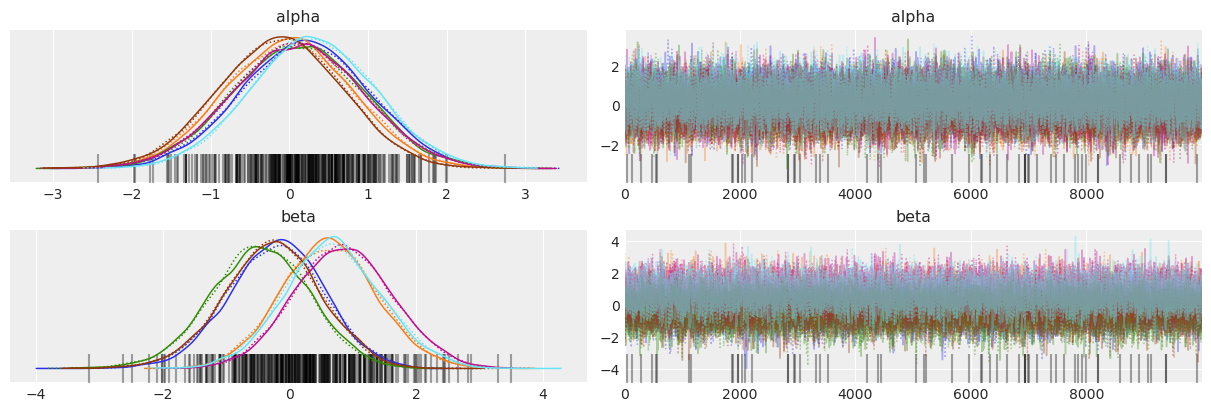

In [344]:
# Define the model
with pm.Model() as multinomial_model:
    # Priors for unknown model parameters with better initial values
    alpha = pm.Normal('alpha', mu=0.1, sigma=1, shape=(3, 2), 
                      initval=np.array([[0.1, 0.2], [0.2, 0.3], [0.3, 0.4]]))
    beta = pm.Normal('beta', mu=0.2, sigma=1, shape=(3, 2),
                     initval=np.array([[0.1, 0.2], [0.2, 0.3], [0.3, 0.4]]))
    
    # Expected value of outcome (using the softmax link function)
    eta = alpha[locations-1] + beta[locations-1] * time[:, None]

    # Softmax eta to probability scale, shape K-1
    mu = pytensor.tensor.special.softmax(eta, axis = 1)
    #mu = pm.math.softmax(eta + 1e-6, axis=1)

    # Add K-th category. Had to softmax this result (mu_soft) to avoid numerical issues.
    mu = pm.math.concatenate([mu, 1 - pm.math.sum(mu, axis=1, keepdims=True)], axis=1)  # Add the K-th category
    mu_soft = pytensor.tensor.special.softmax(mu, axis = 1)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Multinomial('Y_obs', n=20, p=mu_soft, observed=Y)
    
    # Inference
    trace = pm.sample(10000, tune=2000, cores=2)

    # Perform posterior predictive sampling within the model's context
    posterior_predictive = pm.sample_posterior_predictive(trace)

# Plot the results
pm.plot_trace(trace)

# Print summary of the trace
print(pm.summary(trace))


In [335]:
multinomial_model.debug(verbose=True)

point={'alpha': array([[0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4]]), 'beta': array([[0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4]])}

The variable Y_obs has the following parameters:
0: [20] [id A] <Vector(int8, shape=(1,))>
1: Join [id B] <Matrix(float64, shape=(100, ?))>
 ├─ 1 [id C] <Scalar(int8, shape=())>
 ├─ Softmax{axis=1} [id D] <Matrix(float64, shape=(100, ?))>
 │  └─ Add [id E] <Matrix(float64, shape=(100, ?))>
 │     ├─ AdvancedSubtensor1 [id F] <Matrix(float64, shape=(100, 2))>
 │     │  ├─ alpha [id G] <Matrix(float64, shape=(3, 2))>
 │     │  └─ [2 1 2 2 0 ... 1 2 2 1 2] [id H] <Vector(uint8, shape=(100,))>
 │     └─ Mul [id I] <Matrix(float64, shape=(100, ?))>
 │        ├─ AdvancedSubtensor1 [id J] <Matrix(float64, shape=(100, 2))>
 │        │  ├─ beta [id K] <Matrix(float64, shape=(3, 2))>
 │        │  └─ [2 1 2 2 0 ... 1 2 2 1 2] [id H] <Vector(uint8, shape=(100,))>
 │        └─ [[ 0.] [ 1 ... 5.] [ 6.]] [id L] <Matrix(float64, shape=(100, 1))>
 └─ Sub [id M] 

0.9999999999999998

In [350]:
# Extract the model predictions
predicted_probs = posterior_predictive['Y_obs']

# Convert the predicted data to a DataFrame for plotting
predicted_data = pd.DataFrame({
    'time': time,
    'location': locations,
    'clade_1': predicted_probs[:, :, 0].mean(axis=1),
    'clade_2': predicted_probs[:, :, 1].mean(axis=1),
    'clade_3': predicted_probs[:, :, 2].mean(axis=1)
})

# Melt the predicted DataFrame for easier plotting with seaborn
predicted_data_melted = predicted_data.melt(id_vars=['time', 'location'], value_vars=['clade_1', 'clade_2', 'clade_3'],
                                            var_name='clade', value_name='predicted_count')

# Plot the response counts over time for each location using a faceted grid without shaded regions
g = sns.FacetGrid(data_melted, col="location", hue="clade", col_wrap=3, height=4)
g.map(sns.lineplot, "time", "count", marker="o", ci=None)
g.map(sns.lineplot, "time", "predicted_count", data=predicted_data_melted, linestyle="--", ci=None)
g.add_legend()
g.set_axis_labels("Time", "Count")
g.set_titles("Location {col_name}")
plt.show()

KeyError: 'Y_obs'

Simulating Multinomial Logistic Regression Data

Reference: https://github.com/blab/evofr/blob/main/evofr/models/multinomial_logistic_regression.py

In [214]:
def simulate_MLR_freq(growth_advantage, freq0, tau, max_time):
    times = np.arange(max_time)
    delta = np.log(growth_advantage) / tau  # to relative fitness
    ufreq = freq0 * np.exp(delta * times[..., None])
    return ufreq / ufreq.sum(axis=-1)[..., None]


def simulate_MLR(growth_advantage, freq0, tau, Ns):
    max_time = len(Ns)
    freq = simulate_MLR_freq(growth_advantage, freq0, tau, max_time)
    seq_counts = [np.random.multinomial(Ns[t], freq[t, :]) for t in range(max_time)]
    return freq, np.stack(seq_counts)

In [ ]:
simulate_MLR_freq(growth_advantage=np.array([1,2,3]), 
                  freq0=np.array([0.2,0.2,0.6]),
                  tau = 5, 
                  max_time = 4)

array([[0.2       , 0.2       , 0.6       ],
       [0.16989781, 0.19516133, 0.63494086],
       [0.14336826, 0.18917555, 0.66745619],
       [0.12026078, 0.18228126, 0.69745796]])

In [50]:
simulate_MLR(growth_advantage=np.array([1,2,3]), 
             freq0=np.array([0.2,0.2,0.6]), 
             tau=2, 
             Ns=np.array([100,70,50,25]))

(array([[0.2       , 0.2       , 0.6       ],
        [0.13139973, 0.18582727, 0.682773  ],
        [0.08333333, 0.16666667, 0.75      ],
        [0.05150157, 0.14566843, 0.80283   ]]),
 array([[21, 18, 61],
        [ 9, 15, 46],
        [ 1,  7, 42],
        [ 2,  6, 17]]))

## More Locations/Variants

In [345]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [346]:
locations

array([3, 2, 3, 3, 1, 3, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 3, 1, 2, 3, 2,
       1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 3, 2, 2, 3, 3, 3,
       2, 1, 1, 3, 2, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 1, 3,
       3, 1, 3, 2, 3, 2, 2, 3, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 3,
       2, 2, 2, 3, 1, 3, 3, 2, 3, 3, 2, 3])

/opt/anaconda3/envs/asper_pymc/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


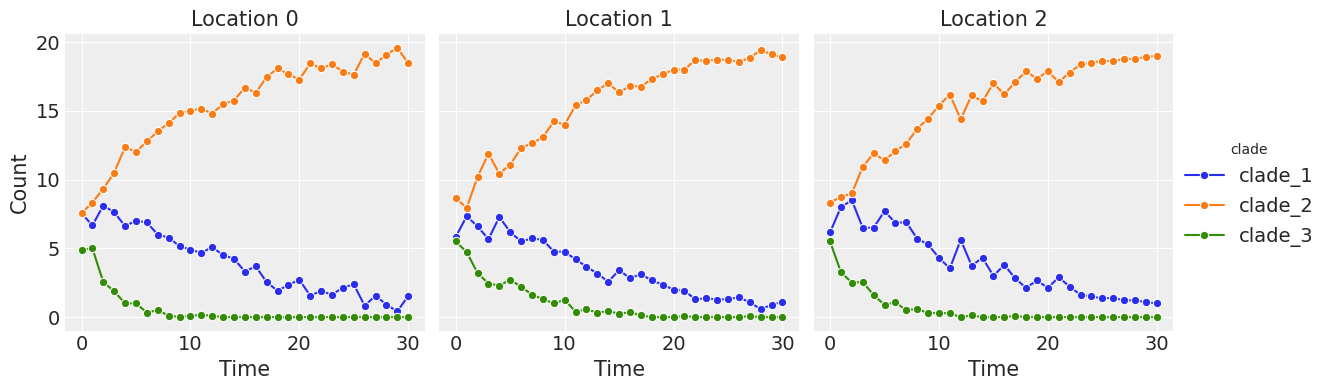

In [349]:
# Simulate some data
np.random.seed(123)
num_loc = 3
size = 1000
time = np.tile(np.arange(0, 31), size // 31 + 1)[:size]  # Repeat time array to match the size
locations = np.random.choice(num_loc, size=size)  # Three locations
alpha = np.array([[0.1, 0.2], [0.2, 0.3], [0.3, 0.4]])  # Intercepts for each location and category (K-1)
beta = np.array([[0.2, 0.3], [0.3, 0.4], [0.4, 0.5]])   # Slopes for each location and category (K-1)

# Calculate the linear predictor for each location and category
eta = np.array([alpha[loc-1] + beta[loc-1] * time[i] for i, loc in enumerate(locations)])

# Apply the softmax function to get probabilities
probs = np.exp(eta) / (1 + np.sum(np.exp(eta), axis=1, keepdims=True))
probs = np.hstack([probs, 1 - np.sum(probs, axis=1, keepdims=True)])  # Add the K-th category

# Simulate multinomial counts
Y = np.array([np.random.multinomial(20, p) for p in probs])

# Convert the simulated data to a DataFrame for plotting
data = pd.DataFrame({
    'time': time,
    'location': locations,
    'clade_1': Y[:, 0],
    'clade_2': Y[:, 1],
    'clade_3': Y[:, 2]
})

# Melt the DataFrame for easier plotting with seaborn
data_melted = data.melt(id_vars=['time', 'location'], value_vars=['clade_1', 'clade_2', 'clade_3'],
                        var_name='clade', value_name='count')

# Plot the response counts over time for each location using a faceted grid
g = sns.FacetGrid(data_melted, col="location", hue="clade", col_wrap=3, height=4)
g.map(sns.lineplot, "time", "count", marker="o", errorbar=None)
g.add_legend()
g.set_axis_labels("Time", "Count")
g.set_titles("Location {col_name}")
plt.show()


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


Output()

Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 399 seconds.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [Y_obs]


Output()

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0, 0]  0.020  0.717  -1.372    1.314      0.006    0.006   13963.0   
alpha[0, 1]  0.184  0.715  -1.129    1.540      0.006    0.005   13791.0   
alpha[1, 0]  0.172  0.719  -1.125    1.569      0.005    0.006   17563.0   
alpha[1, 1]  0.042  0.719  -1.311    1.387      0.005    0.006   17797.0   
alpha[2, 0]  0.281  0.724  -1.094    1.615      0.006    0.005   13941.0   
alpha[2, 1] -0.085  0.723  -1.373    1.335      0.006    0.006   13796.0   
beta[0, 0]  -0.043  0.709  -1.331    1.329      0.006    0.006   14781.0   
beta[0, 1]   0.463  0.709  -0.841    1.824      0.006    0.005   14784.0   
beta[1, 0]  -0.031  0.713  -1.417    1.281      0.006    0.006   13469.0   
beta[1, 1]   0.425  0.713  -0.950    1.754      0.006    0.005   13480.0   
beta[2, 0]  -0.074  0.710  -1.407    1.242      0.006    0.006   15043.0   
beta[2, 1]   0.485  0.710  -0.877    1.780      0.006    0.005   14836.0   

           

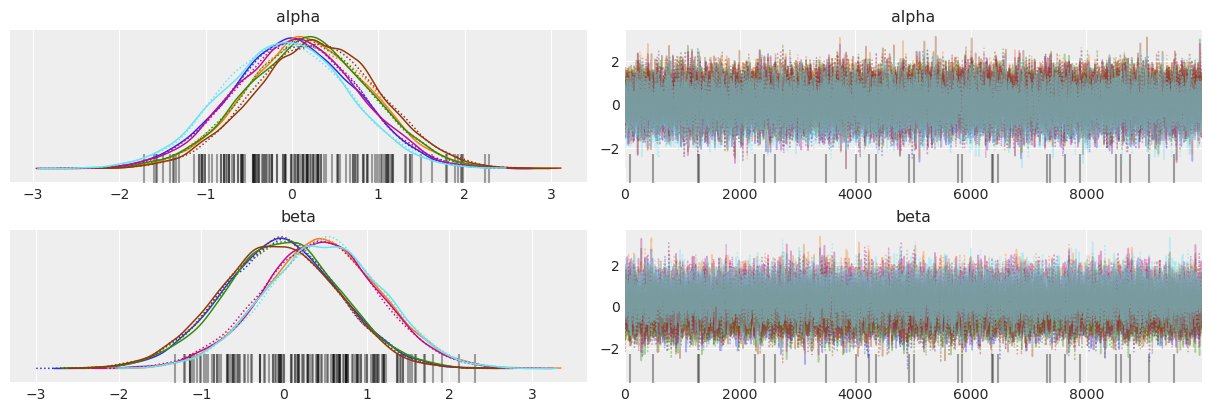

In [351]:
# Define the model
with pm.Model() as multinomial_model:
    # Priors for unknown model parameters with better initial values
    alpha = pm.Normal('alpha', mu=0.1, sigma=1, shape=(num_loc, 2), 
                      initval=np.array([[0.1, 0.2], [0.2, 0.3], [0.3, 0.4]]))
    beta = pm.Normal('beta', mu=0.2, sigma=1, shape=(num_loc, 2),
                     initval=np.array([[0.1, 0.2], [0.2, 0.3], [0.3, 0.4]]))
    
    # Expected value of outcome (using the softmax link function)
    eta = alpha[locations-1] + beta[locations-1] * time[:, None]

    # Softmax eta to probability scale, shape K-1
    mu = pytensor.tensor.special.softmax(eta, axis = 1)
    #mu = pm.math.softmax(eta + 1e-6, axis=1)

    # Add K-th category. Had to softmax this result (mu_softmax) to avoid numerical issues.
    mu = pm.math.concatenate([mu, 1 - pm.math.sum(mu, axis=1, keepdims=True)], axis=1)  # Add the K-th category
    mu_softmax = pytensor.tensor.special.softmax(mu, axis = 1)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Multinomial('Y_obs', n=20, p=mu_softmax, observed=Y)
    
    # Inference
    trace = pm.sample(10000, tune=2000, cores=2)

    # Perform posterior predictive sampling within the model's context
    posterior_predictive = pm.sample_posterior_predictive(trace)

# Plot the results
pm.plot_trace(trace)

# Print summary of the trace
print(pm.summary(trace))


# Variable Counts

/opt/anaconda3/envs/asper_pymc/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


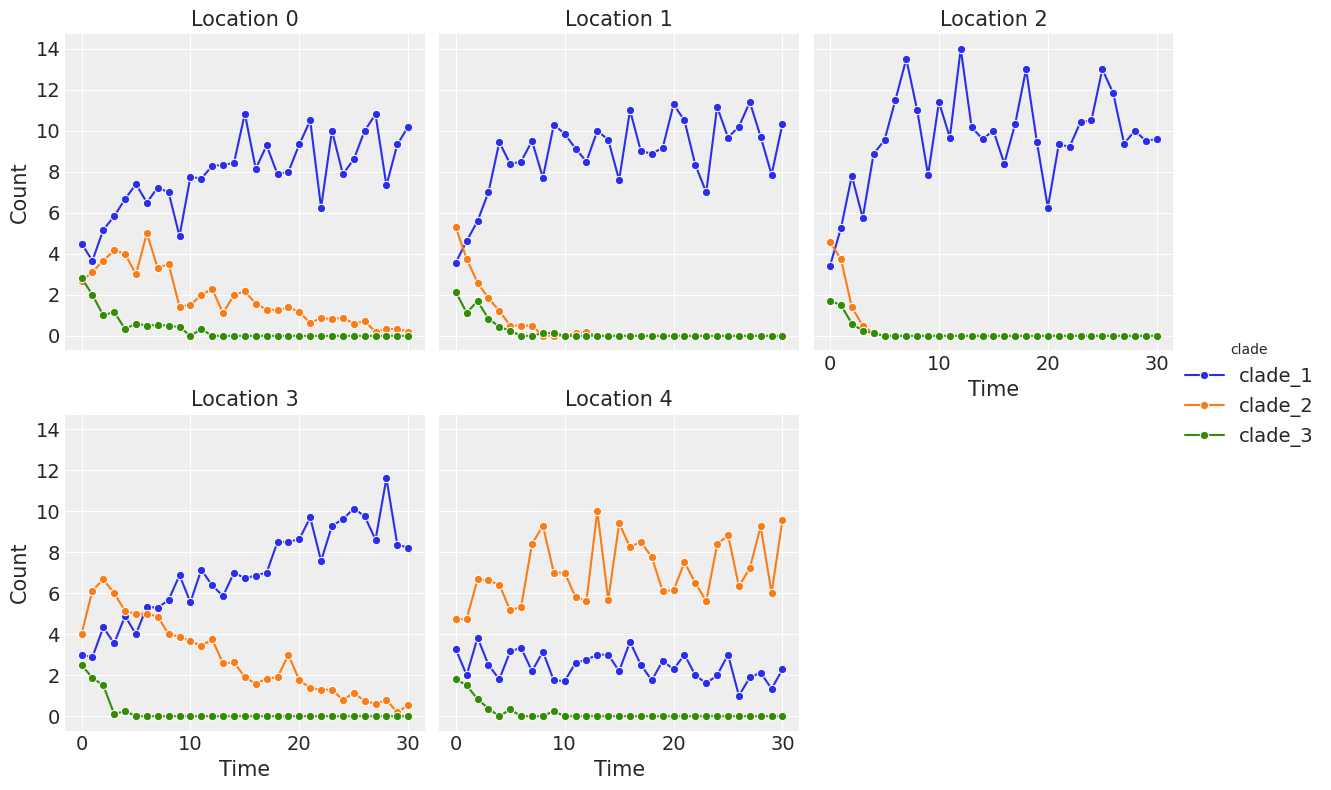

In [ ]:
# User-specified number of locations
num_loc = 5  # You can change this value to specify the number of locations

# Simulate some data
np.random.seed(123)
size = 1000
time = np.tile(np.arange(0, 31), size // 31 + 1)[:size]  # Repeat time array to match the size
locations = np.random.choice(num_loc, size=size)  # User-specified number of locations
alpha = np.random.rand(num_loc, 2)  # Random intercepts for each location and category (K-1)
beta = np.random.rand(num_loc, 2)   # Random slopes for each location and category (K-1)

# Calculate the linear predictor for each location and category
eta = np.array([alpha[loc] + beta[loc] * time[i] for i, loc in enumerate(locations)])

# Apply the softmax function to get probabilities
probs = np.exp(eta) / (1 + np.sum(np.exp(eta), axis=1, keepdims=True))
probs = np.hstack([probs, 1 - np.sum(probs, axis=1, keepdims=True)])  # Add the K-th category

# Simulate variable multinomial counts
total_counts = np.random.poisson(10, size=size)  # Poisson-distributed total counts, including zeros
Y = np.array([np.random.multinomial(n, p) if n > 0 else np.zeros(len(p)) for n, p in zip(total_counts, probs)])

# Convert the simulated data to a DataFrame for plotting
data = pd.DataFrame({
    'time': time,
    'location': locations,
    'clade_1': Y[:, 0],
    'clade_2': Y[:, 1],
    'clade_3': Y[:, 2],
    'total_counts': total_counts
})

# Melt the DataFrame for easier plotting with seaborn
data_melted = data.melt(id_vars=['time', 'location', 'total_counts'], value_vars=['clade_1', 'clade_2', 'clade_3'],
                        var_name='clade', value_name='count')

# Plot the response counts over time for each location using a faceted grid
g = sns.FacetGrid(data_melted, col="location", hue="clade", col_wrap=3, height=4)
g.map(sns.lineplot, "time", "count", marker="o", errorbar=None)
g.add_legend()
g.set_axis_labels("Time", "Count")
g.set_titles("Location {col_name}")
plt.show()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


Output()

Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 438 seconds.
There were 61 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [Y_obs]


Output()

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0, 0]  0.204  0.743  -1.166    1.622      0.006    0.005   13730.0   
alpha[0, 1] -0.011  0.740  -1.363    1.404      0.006    0.005   13640.0   
alpha[1, 0] -0.373  0.765  -1.778    1.108      0.006    0.005   15025.0   
alpha[1, 1]  0.567  0.765  -0.908    1.984      0.006    0.005   15011.0   
alpha[2, 0] -0.189  0.766  -1.681    1.198      0.006    0.006   15466.0   
alpha[2, 1]  0.382  0.767  -1.103    1.773      0.006    0.005   15575.0   
alpha[3, 0] -1.101  0.739  -2.544    0.245      0.006    0.005   13603.0   
alpha[3, 1]  1.289  0.742  -0.074    2.681      0.006    0.005   13763.0   
alpha[4, 0] -0.370  0.764  -1.779    1.062      0.006    0.005   14017.0   
alpha[4, 1]  0.566  0.764  -0.883    1.981      0.006    0.005   13867.0   
beta[0, 0]   0.482  0.716  -0.888    1.804      0.006    0.005   13510.0   
beta[0, 1]  -0.081  0.715  -1.459    1.222      0.006    0.005   13441.0   
beta[1, 0]  

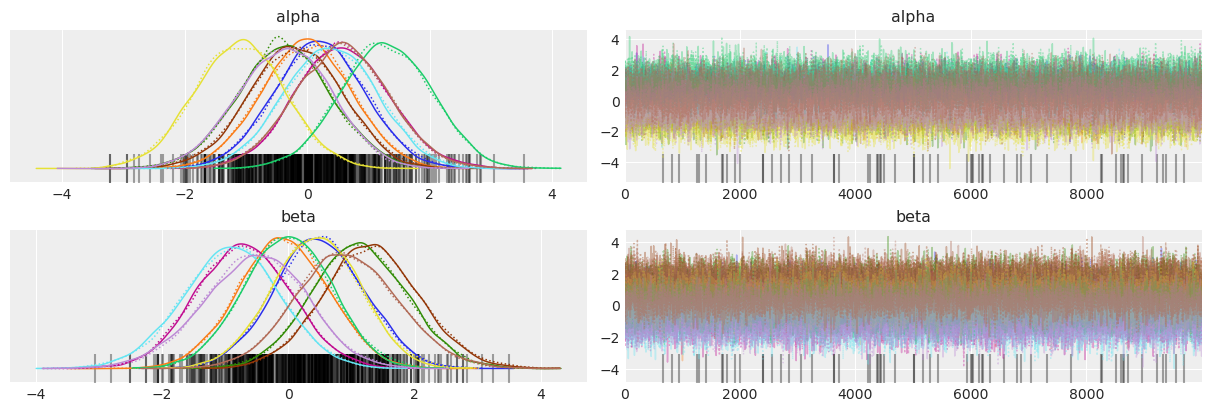

In [ ]:
# Define the model
with pm.Model() as multinomial_model:
    # Priors for unknown model parameters with better initial values
    alpha = pm.Normal('alpha', mu=0.1, sigma=1, shape=(num_loc, 2), 
                      initval=np.random.rand(num_loc, 2))
    beta = pm.Normal('beta', mu=0.2, sigma=1, shape=(num_loc, 2),
                     initval=np.random.rand(num_loc, 2))
    
    # Expected value of outcome (using the softmax link function)
    eta = alpha[locations] + beta[locations] * time[:, None]

    # Softmax eta to probability scale, shape K-1
    mu = pytensor.tensor.special.softmax(eta, axis=1)

    # Add K-th category. Had to softmax this result (mu_softmax) to avoid numerical issues.
    mu = pm.math.concatenate([mu, 1 - pm.math.sum(mu, axis=1, keepdims=True)], axis=1)  # Add the K-th category
    mu_softmax = pytensor.tensor.special.softmax(mu, axis=1)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Multinomial('Y_obs', n=data['total_counts'], p=mu_softmax, observed=Y)
    
    # Inference
    trace = pm.sample(10000, tune=2000, cores=2)

    # Perform posterior predictive sampling within the model's context
    posterior_predictive = pm.sample_posterior_predictive(trace)

# Plot the results
pm.plot_trace(trace)

# Print summary of the trace
print(pm.summary(trace))

In [375]:
multinomial_model.basic_RVs

[alpha ~ Normal(0.1, 1),
 beta ~ Normal(0.2, 1),
 Y_obs ~ Multinomial(<constant>, f(alpha, beta)),
 Y_obs ~ Multinomial(<constant>, f(alpha, beta))]

In [372]:
multinomial_model.free_RVs

[alpha ~ Normal(0.1, 1), beta ~ Normal(0.2, 1)]

In [374]:
multinomial_model.observed_RVs

[Y_obs ~ Multinomial(<constant>, f(alpha, beta)),
 Y_obs ~ Multinomial(<constant>, f(alpha, beta))]

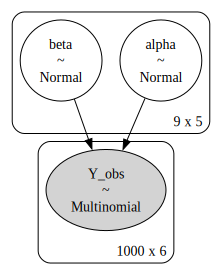

In [371]:
multinomial_model.to_graphviz()

# Hierarchical Multinomial Logistic Regression

* Specified number of locations and diseases (clades)
* Linear Logistic Growth Term
* Write out model mathematically

In [379]:
Y

array([[ 4,  4,  1],
       [ 1,  5,  1],
       [ 6,  1,  2],
       ...,
       [11,  0,  0],
       [11,  0,  0],
       [ 7,  5,  2]])

In [381]:
locations

array([2, 4, 2, 1, 3, 2, 3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 4, 0, 0, 4, 1, 3,
       2, 4, 2, 4, 0, 0, 1, 3, 4, 4, 4, 1, 3, 2, 1, 4, 0, 3, 2, 0, 3, 2,
       2, 2, 2, 4, 3, 3, 4, 4, 3, 2, 0, 4, 3, 1, 3, 2, 1, 2, 4, 0, 1, 4,
       2, 1, 1, 3, 4, 1, 0, 0, 3, 1, 3, 3, 3, 1, 1, 2, 3, 3, 3, 3, 0, 1,
       3, 1, 4, 3, 1, 2, 3, 4, 3, 1, 0, 0, 3, 0, 1, 1, 0, 3, 1, 3, 4, 4,
       1, 4, 4, 3, 4, 3, 0, 4, 4, 4, 4, 0, 0, 1, 0, 0, 4, 2, 2, 0, 1, 0,
       2, 4, 4, 1, 2, 3, 1, 4, 3, 1, 1, 0, 1, 3, 1, 0, 1, 2, 2, 2, 1, 3,
       2, 3, 1, 1, 3, 3, 2, 4, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1, 3, 3, 3, 3,
       0, 0, 4, 4, 0, 0, 4, 1, 2, 1, 4, 1, 3, 4, 2, 2, 4, 3, 0, 3, 3, 2,
       1, 1, 1, 2, 2, 2, 0, 0, 1, 3, 3, 3, 1, 3, 1, 2, 4, 1, 0, 1, 4, 2,
       0, 1, 2, 4, 4, 4, 3, 3, 1, 4, 0, 4, 0, 0, 0, 1, 0, 4, 3, 2, 4, 0,
       1, 2, 2, 2, 2, 3, 2, 1, 0, 4, 1, 1, 2, 0, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 1, 1, 2, 1, 0, 0, 4, 2, 3, 0, 4, 2, 2, 1, 0, 0, 2, 4, 1, 1, 3,
       2, 4, 2, 1, 0, 3, 1, 3, 0, 0, 1, 4, 3, 2, 2,

/opt/anaconda3/envs/asper_pymc/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


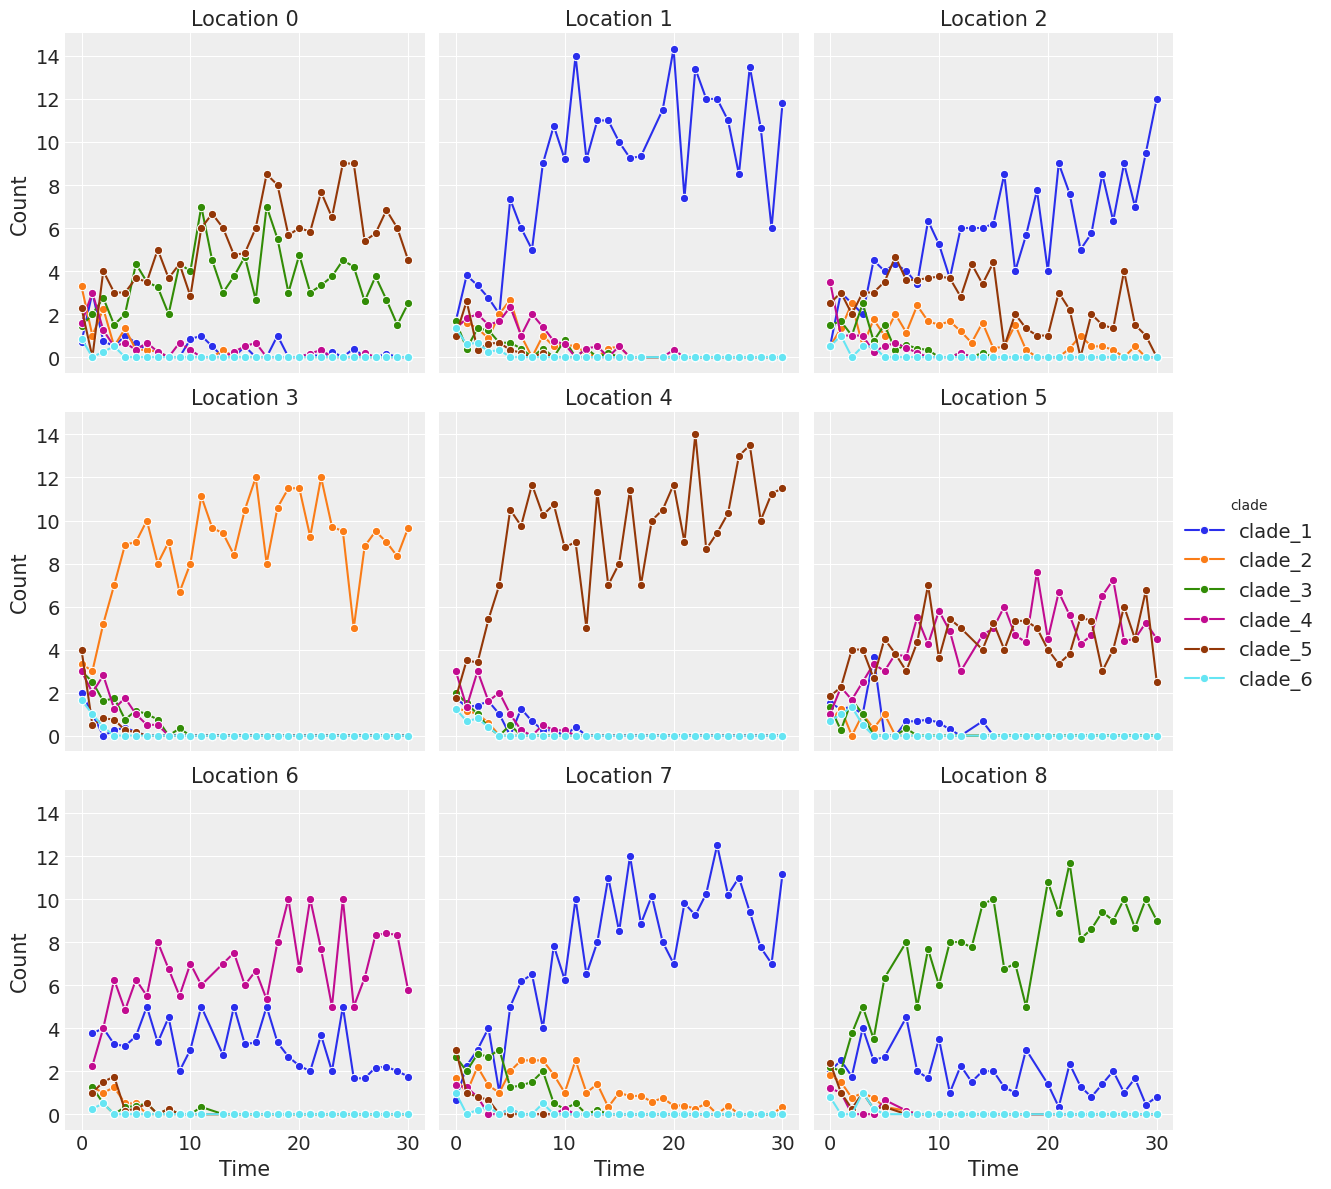

In [404]:
# User-specified number of locations and diseases
num_loc = 9  # You can change this value to specify the number of locations
num_diseases = 6  # You can change this value to specify the number of diseases

# Simulate some data
np.random.seed(123)
size = 1000
time = np.tile(np.arange(0, 31), size // 31 + 1)[:size]  # Repeat time array to match the size
locations = np.random.choice(num_loc, size=size)  # User-specified number of locations
alpha = np.random.rand(num_loc, num_diseases - 1)  # Random intercepts for each location and category (K-1)
beta = np.random.rand(num_loc, num_diseases - 1)   # Random slopes for each location and category (K-1)

# Calculate the linear predictor for each location and category
eta = np.array([alpha[loc] + beta[loc] * time[i] for i, loc in enumerate(locations)])

# Apply the softmax function to get probabilities
probs = np.exp(eta) / (1 + np.sum(np.exp(eta), axis=1, keepdims=True))
probs = np.hstack([probs, 1 - np.sum(probs, axis=1, keepdims=True)])  # Add the K-th category

# Simulate variable multinomial counts
total_counts = np.random.poisson(10, size=size)  # Poisson-distributed total counts, including zeros
Y = np.array([np.random.multinomial(n, p) if n > 0 else np.zeros(len(p)) for n, p in zip(total_counts, probs)])

# Convert the simulated data to a DataFrame for plotting
data = pd.DataFrame({
    'time': time,
    'location': locations,
    **{f'clade_{i+1}': Y[:, i] for i in range(num_diseases)},
    'total_counts': total_counts
})

# Melt the DataFrame for easier plotting with seaborn
data_melted = data.melt(id_vars=['time', 'location', 'total_counts'], 
                        value_vars=[f'clade_{i+1}' for i in range(num_diseases)],
                        var_name='clade', value_name='count')

# Plot the response counts over time for each location using a faceted grid
g = sns.FacetGrid(data_melted, col="location", hue="clade", col_wrap=3, height=4)
g.map(sns.lineplot, "time", "count", marker="o", errorbar=None)
g.add_legend()
g.set_axis_labels("Time", "Count")
g.set_titles("Location {col_name}")
plt.show()

In [408]:
Y

array([[ 0,  1,  2,  4,  1,  0],
       [ 0,  4,  2,  0,  4,  1],
       [ 4,  2,  0,  3,  3,  1],
       ...,
       [ 5,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  4,  0],
       [ 1,  0,  0,  0, 10,  0]])

In [406]:
Y.shape

(1000, 6)

In [382]:
np.isnan(Y)

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [384]:
print(time.shape)
print(locations.shape)
print(total_counts.shape)
print(Y.shape)

(1000,)
(1000,)
(1000,)
(1000, 3)


In [ ]:
# Define the model
with pm.Model() as multinomial_model:
    # Priors for unknown model parameters with better initial values
    alpha = pm.Normal('alpha', mu=0.1, sigma=1, shape=(num_loc, num_diseases-1), 
                      initval=np.random.rand(num_loc, num_diseases-1))
    beta = pm.Normal('beta', mu=0.2, sigma=1, shape=(num_loc, num_diseases-1),
                     initval=np.random.rand(num_loc, num_diseases-1))
    
    # Expected value of outcome (using the softmax link function)
    eta = alpha[locations] + beta[locations] * time[:, None]

    # Softmax eta to probability scale, shape K-1
    mu = pytensor.tensor.special.softmax(eta, axis=1)

    # Add K-th category. Had to softmax this result (mu_softmax) to avoid numerical issues.
    mu = pm.math.concatenate([mu, 1 - pm.math.sum(mu, axis=1, keepdims=True)], axis=1)  # Add the K-th category
    mu_softmax = pytensor.tensor.special.softmax(mu, axis=1)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Multinomial('Y_obs', n=data['total_counts'], p=mu_softmax, observed=Y)
    
    # Inference
    trace = pm.sample(10000, tune=2000, cores=2)

    # Perform posterior predictive sampling within the model's context
    posterior_predictive = pm.sample_posterior_predictive(trace)

# Plot the results
pm.plot_trace(trace)

# Print summary of the trace
print(pm.summary(trace))

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


Output()

ValueError: Not enough samples to build a trace.

In [399]:
print(time.shape)
print(locations.shape)
print(total_counts.shape)
print(Y.shape)

(1000,)
(1000,)
(1000,)
(1000, 6)


In [402]:
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  0,  1,  2,  3,
        4,  5,  6,  7,  8

<Axes: >

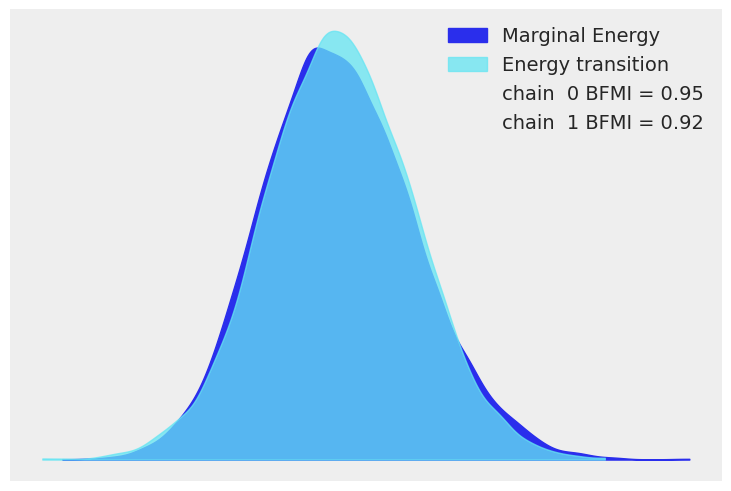

In [376]:
az.plot_energy(trace)